# Face Recognition using Principal Component Analysis

### <b>Objective:</b>
This Task requires you to create a basic facial recognition system using a technique called principal component analysis (PCA) 
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

### <b>About the dataset:</b>  
The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)



### Tasks done in this notebook
1. Load dataset and divide the date into training and test sets. 
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.


In [1]:
#Uncomment if running on colab after uploading ZIP ATnT folder
# !unzip ATnT

Archive:  ATnT.zip
   creating: ATnT/
  inflating: ATnT/README             
   creating: ATnT/s1/
  inflating: ATnT/s1/1.pgm           
  inflating: ATnT/s1/10.pgm          
  inflating: ATnT/s1/2.pgm           
  inflating: ATnT/s1/3.pgm           
  inflating: ATnT/s1/4.pgm           
  inflating: ATnT/s1/5.pgm           
  inflating: ATnT/s1/6.pgm           
  inflating: ATnT/s1/7.pgm           
  inflating: ATnT/s1/8.pgm           
  inflating: ATnT/s1/9.pgm           
   creating: ATnT/s10/
  inflating: ATnT/s10/1.pgm          
  inflating: ATnT/s10/10.pgm         
  inflating: ATnT/s10/2.pgm          
  inflating: ATnT/s10/3.pgm          
  inflating: ATnT/s10/4.pgm          
  inflating: ATnT/s10/5.pgm          
  inflating: ATnT/s10/6.pgm          
  inflating: ATnT/s10/7.pgm          
  inflating: ATnT/s10/8.pgm          
  inflating: ATnT/s10/9.pgm          
   creating: ATnT/s11/
  inflating: ATnT/s11/1.pgm          
  inflating: ATnT/s11/10.pgm         
  inflating: ATnT/s1

#### Import Libraries

In [2]:
from matplotlib import image
from matplotlib import pyplot

from PIL import Image
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

1) Loading data and dividing into train and test set

In [3]:
def preProcessImages(pathToFolder):
    X =[]
    Y =[]

    for d in os.listdir(pathToFolder):
        if d[0]=='s':
        count=0
        for image in os.listdir(pathToFolder+'/'+d):
            if image.endswith('.pgm'):
                count+=1
                image = Image.open(pathToFolder+'/'+d+'/'+image)
                image = np.asarray(image)
                X.append(image)
                Y.append(int(d[1:]))
    X = np.asarray(X)
    X = np.reshape(X,(X.shape[0],X.shape[1]*X.shape[2]))
    Y = np.asarray(Y)
    print(X.shape, Y.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, Y,stratify=Y, test_size=0.25)
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)

    return X_train,y_train, X_test, y_test

In [4]:
X_train,Y_train, X_test, Y_test = preProcessImages('ATnT')

(400, 10304) (400,)
(300, 10304) (300,)
(100, 10304) (100,)


In [5]:
#Scaling
scaling=StandardScaler()
scaled_X_train=scaling.fit_transform(X_train)
scaled_X_test=scaling.transform(X_test)

In [6]:
#Get mean vector
X_train_mean = []
for i in range(X_train.shape[1]):
  col=X_train[:,i]
  X_train_mean.append(np.mean(col))
X_train_mean = np.asarray(X_train_mean)

#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

In [61]:
"""
Implement pca in the following function by taking the following arguements:
1. X(images array)
2. number of components
The function must return the eigen vectors (principal components) also termed "Eigen faces"
"""

def principalComponentAnalysis(X, number_of_components):
    n = X.shape[0]
    d = X.shape[1]
    #dxd taking covariance matrix of X Transpose
    Cov_Matrix = np.cov(X.T)
    eigenVal , eigenVectors = np.linalg.eigh(Cov_Matrix) #Get eigen values and vectors in descending order as per eigen values
    #eigen vector - dx1
    #Storing all eigen vectors in global variable so as to reduce computation later
    indexes = np.argsort(eigenVal)[::-1] #Pick top K components as given in parameters
    eigenVectors = eigenVectors[:,indexes]

    return eigenVectors[:,:] #Return dxk matrix where each row is eigen faces with dimension 1xd

In [62]:
#Sample run for 50 vectors, so as to store all eigen faces globally
globalEigenFaces = principalComponentAnalysis(scaled_X_train,50)

In [63]:
globalEigenFaces.shape

(10304, 10304)

In [60]:
eigen_faces[0]

array([ 0.00880242, -0.01398138,  0.01916469, ..., -0.        ,
        0.        ,  0.        ])

#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

In [64]:
# Function to implement image reconstruction by taking arguements as necessary.
def imageReconstruction(X,X_mean,eigen_faces):
    X = X - X_mean
    X = np.dot(X,eigen_faces)
    X = np.dot(X,eigen_faces.T)
    X = X + X_mean
    return X

#### Visualisation
Visualise the results for different number of principal components(pc = 5,10,100, 1000, all).

**Note:** Ensure that the images are labelled appropriately.

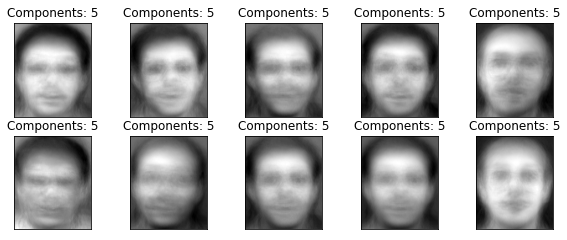

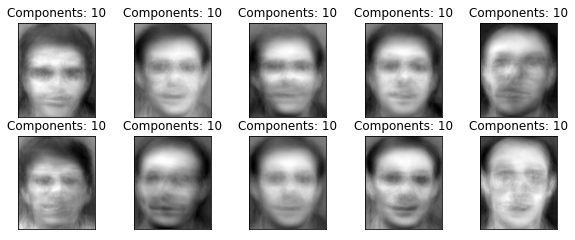

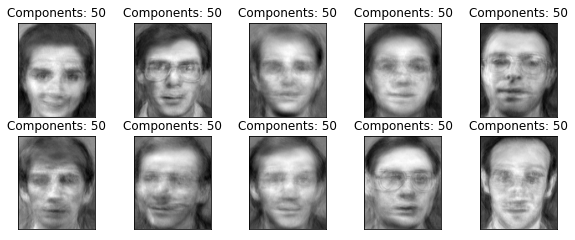

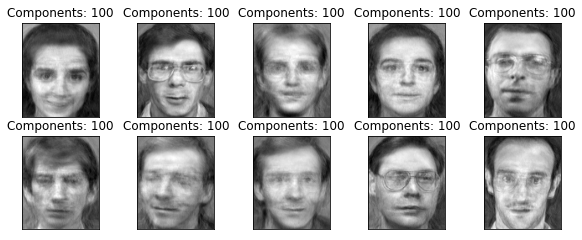

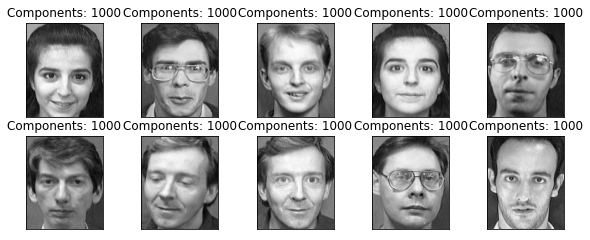

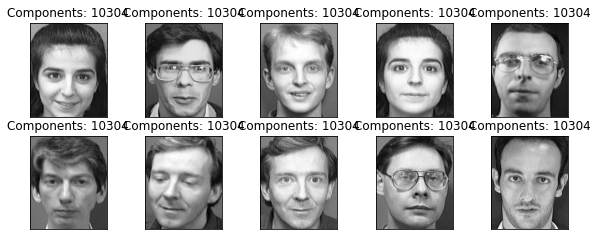

In [66]:
pca_components=[5,10,50,100,1000,X_train.shape[1]]

for k in pca_components:
    eigen_faces = globalEigenFaces[:,:k]
    #Take first 10 images from train set
    reconstructedImages = imageReconstruction(X_train[:10,:],X_train_mean,eigen_faces)
    plt.figure(figsize=(10,10))
    for i in range(10): # loop through first 10 rows
        plt.subplot(5,5,i+1) 
        plt.xticks([])
        plt.yticks([])
        plt.grid(False) 
        plt.title('Components: '+str(k))
        plt.imshow(reconstructedImages[i].reshape(112, 92),cmap='gray')
    plt.show() 

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them. 
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations. 
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [67]:
"""
Implement pca in the following function by taking the following arguements:
1. Test image
2. Eigenvectors
3. Mean Eigen Face
4. Training Set(X_train,y_train)
The function must return the following:
1. image with smallest error
2. error value
3. prediction class
"""
def model(X_test,eigen_faces,X_train_mean,X_train,y_train):
    reduced_X_train = np.dot(X_train,eigen_faces)
    reduced_X_test = np.dot(X_test,eigen_faces)
    Y_pred=[]
    errors=0
    images=[]
    for i in range(reduced_X_test.shape[0]):
        #1-NN
        minMSE=float('inf')
        index=0
        for j in range(reduced_X_train.shape[0]):
        mse = np.sum(np.square(reduced_X_test[i]-reduced_X_train[j]))/len(reduced_X_train[j])
        if mse<minMSE:
          minMSE=mse
          index=j
        Y_pred.append(y_train[index])
        errors+=minMSE
        images.append(X_train[index])
    images = np.asarray(images)
    Y_pred = np.asarray(Y_pred)
    return (images, errors, Y_pred)

In [69]:
"""
Iterate through all the images in the test data and 
test the accurate by taking different number of components
"""
pca_components=[5,10,50,100,1000,X_train.shape[1]]
mseArr=[]
for k in pca_components:
    images, errors, Y_pred = model(X_test,globalEigenFaces[:,:k],X_train_mean,X_train,Y_train)
    print("Accuracy for test set for number of components=",k," is : ",accuracy_score(Y_test,Y_pred))
    mseArr.append(errors)

Accuracy for test set for number of components= 5  is :  0.83
Accuracy for test set for number of components= 10  is :  0.92
Accuracy for test set for number of components= 50  is :  0.96
Accuracy for test set for number of components= 100  is :  0.96
Accuracy for test set for number of components= 1000  is :  0.96
Accuracy for test set for number of components= 10304  is :  0.96


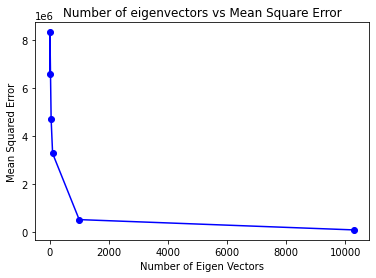

In [70]:
# Plot Number of eigenvectors vs Mean Square Error
plt.plot(pca_components,mseArr,'bo-')
plt.xlabel('Number of Eigen Vectors') 
plt.ylabel('Mean Squared Error') 
plt.title('Number of eigenvectors vs Mean Square Error')
plt.show()

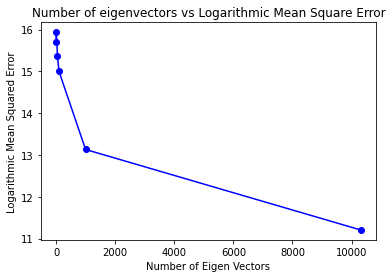

In [71]:
# Plot Number of eigenvectors vs Logarithmic Mean Square Error
plt.plot(pca_components,np.log(mseArr),'bo-')
plt.xlabel('Number of Eigen Vectors') 
plt.ylabel('Logarithmic Mean Squared Error') 
plt.title('Number of eigenvectors vs Logarithmic Mean Square Error')
plt.show()

Summarise your observations on the plots and accuracies

**Answer:** As the number of Eigen Vectors increase , MSE decreases and thus, accuracy increase.


State the advantages and limitations of using PCA in general. Also state its limitations in context of face recognition

**Answer:**
Advantages: 1) Removes correlated features, 2)Reduces overfitting, 3)Improves visualization as any dimensional data can be brought to 2D or 3D.

DisAdvantages: 1)Independent data becomes less interpretable, 2)Data standardization is must before PCA, 3)Information loss if we reduce the dimensions much.


Limitations of PCA in face recognition : If we reduce the dimensions, then due to information loss, the quality of image becomes poor. Also,it is very computationally expensive in today's world where the original size of images are in Megabytes , thus dealing with lots of pixels.